# 🏁 Wrap-up quiz

**This quiz requires some programming to be answered.**

Open the dataset `house_prices.csv` with the following command:

In [2]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]


`ames_housing` is a pandas dataframe. The column "SalePrice" contains the
target variable. Note that we instructed pandas to treat the character "?" as a
marker for cells with missing values also known as "null" values.

To simplify this exercise, we will only used the numerical features defined
below:

In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]


Start by fitting a linear regression (`sklearn.linear_model.LinearRegression`).
Use a 10-fold cross-validation and pass the argument `return_estimator=True` in
`sklearn.model_selection.cross_validate` to access all fitted estimators fitted
on each fold. As we saw in the previous notebooks, you will have to use a
`sklearn.preprocessing.StandardScaler` to scale the data before passing it to
the regressor. Also, some missing data are present in the different columns.
You can use a `sklearn.impute.SimpleImputer` with the default parameters to
impute missing data.

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())
cv_result = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

In [15]:
import numpy as np 
cv_result['estimator']

for idx, pipeline in enumerate(cv_result["estimator"]):
    print(
        f"Fold #{idx} - features selected are: "
        f"{np.argsort(pipeline[-1].coef_)[-2:]}"
        f"\n and weights are {np.max(abs(pipeline[-1].coef_))}"
    )


Fold #0 - features selected are: [10 15]
 and weights are 20942.868431280887
Fold #1 - features selected are: [8 6]
 and weights are 3.820401414396077e+17
Fold #2 - features selected are: [10 15]
 and weights are 19834.47165586813
Fold #3 - features selected are: [10 15]
 and weights are 20243.84416556719
Fold #4 - features selected are: [10 15]
 and weights are 19634.19681674728
Fold #5 - features selected are: [10 15]
 and weights are 22652.887617370136
Fold #6 - features selected are: [10 15]
 and weights are 20200.509719152655
Fold #7 - features selected are: [10 15]
 and weights are 20103.706511184588
Fold #8 - features selected are: [ 6 10]
 and weights are 17152.20750661062
Fold #9 - features selected are: [ 3 10]
 and weights are 1.8041680050201856e+18


# Question 1
What is the order of magnitude of the extremum weight values over all the features:

- a) 1e4
- b) 1e6
- c) 1e18

_Select a single answer_


+++

Repeat the same experiment by fitting a ridge regressor
(`sklearn.linear_model.Ridge`) with the default parameter.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())
cv_result = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

In [17]:
import numpy as np 
cv_result['estimator']

for idx, pipeline in enumerate(cv_result["estimator"]):
    print(
        f"Fold #{idx} - features selected are: "
        f"{np.argsort(pipeline[-1].coef_)[-2:]}"
        f"\n and weights are {np.max(abs(pipeline[-1].coef_))}"
    )

Fold #0 - features selected are: [10 15]
 and weights are 20868.215473229386
Fold #1 - features selected are: [10 15]
 and weights are 20330.3048222674
Fold #2 - features selected are: [10 15]
 and weights are 19764.80244161082
Fold #3 - features selected are: [10 15]
 and weights are 20169.142445251662
Fold #4 - features selected are: [10 15]
 and weights are 19570.04868516873
Fold #5 - features selected are: [10 15]
 and weights are 22561.856453251723
Fold #6 - features selected are: [10 15]
 and weights are 20127.805614522495
Fold #7 - features selected are: [10 15]
 and weights are 20032.776933179204
Fold #8 - features selected are: [ 6 10]
 and weights are 17143.069696078583
Fold #9 - features selected are: [10 15]
 and weights are 19143.34269459518


# Question 2
What magnitude of the extremum weight values for all features?

- a) 1e4
- b) 1e6
- c) 1e18

_Select a single answer_
```

+++

# Question 3
What are the two most important features used by the ridge regressor? You can
make a box-plot of the coefficients across all folds to get a good insight.

- a) `"MiscVal"` and `"BsmtFinSF1"`
- b) `"GarageCars"` and `"GrLivArea"`
- c) `"TotalBsmtSF"` and `"GarageCars"`

_Select a single answer_
```

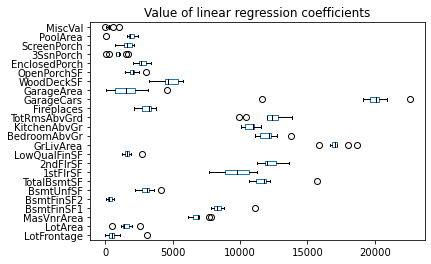

In [23]:
import pandas as pd

weights = pd.DataFrame(
    [np.abs(est[-1].coef_) for est in cv_result["estimator"]], columns=data[numerical_features].columns)
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights.plot.box(color=color, vert=False)
_ = plt.title("Value of linear regression coefficients")


+++

Remove the feature `"GarageArea"` from the dataset and repeat the previous
experiment.

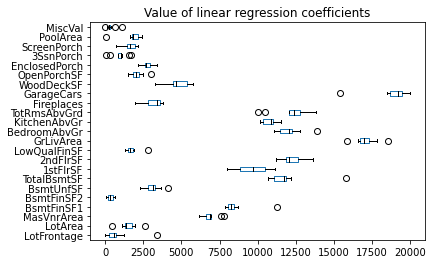

In [30]:
numerical_features_wo_garage = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_wo_garage_numerical = data[numerical_features_wo_garage]



cv_result = cross_validate(model, data_wo_garage_numerical, target, cv=10, return_estimator=True)
weights = pd.DataFrame(
    [np.abs(est[-1].coef_) for est in cv_result["estimator"]], columns=data_wo_garage_numerical.columns)
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights.plot.box(color=color, vert=False)
_ = plt.title("Value of linear regression coefficients")


# Question 4
What is the impact on the weights of removing `"GarageArea"` from the dataset?

- a) None
- b) Change completely the order of the feature importance
- c) The variability of the most important feature reduced

_Select a single answer_
```

+++

# Question 5
What is the reason for observing the previous impact on the most important
weight?

- a) Both features are correlated and are carrying similar information
- b) Removing a feature reduce the noise in the dataset
- c) Just some random effects

_Select a single answer_
```

+++

Now, we will search for the regularization strength that will maximize the
statistical performance of our predictive model. Fit a
[`sklearn.linear_model.RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)
instead of a `Ridge` regressor pass `alphas=np.logspace(-1, 3, num=30)` to
explore the effect of changing the regularization strength.

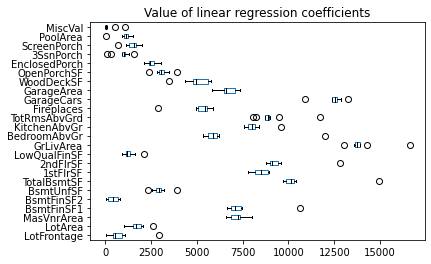

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

model = make_pipeline(StandardScaler(), SimpleImputer(), RidgeCV(alphas=np.logspace(-1, 3, num=30)))
cv_result = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)

weights = pd.DataFrame(
    [np.abs(est[-1].coef_) for est in cv_result["estimator"]], columns=data_numerical.columns)
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights.plot.box(color=color, vert=False)
_ = plt.title("Value of linear regression coefficients")

# Question 6
Are there major differences regarding the most important weights?

- a) Yes, the weights order is completely different
- b) No, the weights order is very similar

_Select a single answer_
```

+++

Check the parameter `alpha_` (the regularization strength) for the different
ridge regressors obtained on each fold.

In [34]:
cv_result
[np.abs(est[-1].alpha_) for est in cv_result["estimator"]]

[385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 385.6620421163472,
 57.361525104486816,
 385.6620421163472]

# Question 7
In which range does `alpha_` fall into for most folds?

- a) between 0.1 and 1
- b) between 1 and 10
- c) between 10 and 100
- d) between 100 and 1000

_Select a single answer_
```

+++

Now, we will tackle a classification problem instead of a regression problem.
Load the Adult Census dataset with the following snippet of code and we will
work only with **numerical features**.

In [35]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


# Question 8
How many numerical features are present in the dataset?

- a) 3
- b) 4
- c) 5

_Select a single answer_


# Question 9
Are there missing values in this dataset?

- a) Yes
- b) No

_Select a single answer_

Hint: you can use `df.info()` to get information regarding each column.
```

+++

Fit a `sklearn.linear_model.LogisticRegression` classifier using a 10-fold
cross-validation to assess the performance. Since we are dealing with a linear
model, do not forget to scale the data with a `StandardScaler` before training
the model.

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data, target, cv=10, return_estimator=True)
cv_result

print(f'Score is {cv_result["test_score"].mean():0.2f} +/- {cv_result["test_score"].std():0.2f}')

Score is 0.80 +/- 0.00


In [45]:
target.value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [46]:
from sklearn.dummy import DummyClassifier

class_to_predict = " <=50K"
low_revenue_clf = DummyClassifier(strategy="constant",
                                  constant=class_to_predict)
low_revenue_clf.fit(data, target)
score = low_revenue_clf.score(data, target)
print(f"Accuracy of a model predicting only low revenue: {score:.3f}")



Accuracy of a model predicting only low revenue: 0.761


# Question 10
On average, how much better/worse/similar is the logistic regression  to a dummy
classifier that would predict the most frequent class?

- a) Worse than a dummy classifier by ~4%
- b) Similar to a dummy classifier
- c) Better than a dummy classifier by ~4%

_Select a single answer_
```

+++

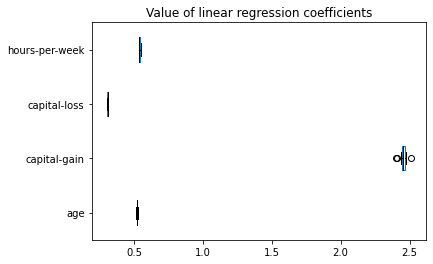

In [62]:
weights = pd.DataFrame(
    np.array([np.abs(est[-1].coef_) for est in cv_result["estimator"]]).reshape(10,-1), columns=data.columns)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights.plot.box(color=color, vert=False)
_ = plt.title("Value of linear regression coefficients")

# Question 11
What is the most important feature seen by the logistic regression?

- a) `"age"`
- b) `"capital-gain"`
- c) `"capital-loss"`
- d) `"hours-per-week"`

_Select a single answer_
```

+++

Now, we will work with **both numerical and categorical features**. You can
load Adult Census with the following snippet:

In [63]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


# Question 12
Are there missing values in this dataset?

- a) Yes
- b) No

_Select a single answer_

Hint: you can use `df.info()` to get information regarding each column.
```

+++

Create a predictive model where the categorical data should be one-hot encoded,
the numerical data should be scaled, and the predictor used should be a
logistic regression classifier.

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(data)

preprocessor = ColumnTransformer(transformers=[
    ("num-preprocessor", StandardScaler(), numerical_columns),
    ("cat-preprocessor", OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

model = make_pipeline(preprocessor, LogisticRegression())
cv_result = cross_validate(model, data, target, cv=10, return_estimator=True)
cv_result

print(f'Score is {cv_result["test_score"].mean():0.2f} +/- {cv_result["test_score"].std():0.2f}')

/home/explore/miniconda3/envs/scikit-learn-course/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/explore/miniconda3/envs/scikit-learn-course/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Score is 0.85 +/- 0.00


/home/explore/miniconda3/envs/scikit-learn-course/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Question 13
On average, what is the improvement of using the categorical features?

- a) It gives similar results
- b) It improves the statistical performance by 2.5%
- c) it improves the statistical performance by 5%
- d) it improves the statistical performance by 7.5%
- e) it improves the statistical performance by 10%

_Select a single answer_
```

+++

For the following questions, you can use the following snippet to get the
feature names after the preprocessing performed.

In [67]:
preprocessor

ColumnTransformer(transformers=[('num-preprocessor', StandardScaler(),
                                 ['age', 'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat-preprocessor',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [68]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["cat-preprocessor"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns


There is as many feature names as coefficients in the last step of your
predictive pipeline.

In [138]:
for cv in cv_result['estimator']:
    print(np.argmax(cv[-1].coef_[0]))
    print(np.argsort(cv[-1].coef_[0])[-2:])
    print([feature_names[i] for i in np.argsort(cv[-1].coef_[0])[-2:]])
feature_names[23]

1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[27  1]
['marital-status_ Married-civ-spouse', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']
1
[23  1]
['education_ Prof-school', 'workclass_ Federal-gov']


'education_ Prof-school'

# Question 14
What are the two most important features used by the logistic regressor?

- a) `"hours-per-week"` and `"native-country_Columbia"`
- b) `"workclass_?"` and `"naitive_country_?"`
- c) `"capital-gain"` and `"education_Doctorate"`

_Select a single answer_
```

+++

# Question 15
What is the effect of decreasing the `C` parameter on the coefficients?

- a) shrinking the magnitude of the weights towards zeros
- b) increasing the magnitude of the weights
- c) reducing the weights' variance
- d) increasing the weights' variance
- e) it has no influence on the weights' variance

_Select several answers_
```